In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


In [2]:
import pandas as pd
import numpy as np

In [3]:
countries_data=pd.read_csv('Country-data.csv')

In [4]:
countries_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Part 2.Cleaning the missing values and data defination analysis

In [6]:
## Getting the missing value count column wise
countries_data.isnull().sum()


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [7]:
## There are no missing values as we can see

As can be seente values presentin the export, health and import are given as a % of the GDP, we need to convert them to numerical format.

In [8]:
countries_data['exports'] = (countries_data['exports']/100)*countries_data['gdpp']
countries_data['health'] = (countries_data['health']/100)*countries_data['gdpp']
countries_data['imports'] = (countries_data['imports']/100)*countries_data['gdpp']

In [9]:
countries_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [10]:
country_col = countries_data['country']

In [11]:
## Dropping the column nae counrty
countries_data.drop('country', axis = 1, inplace = True)

## Part 3. Visuslizing and analyzing the  data

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

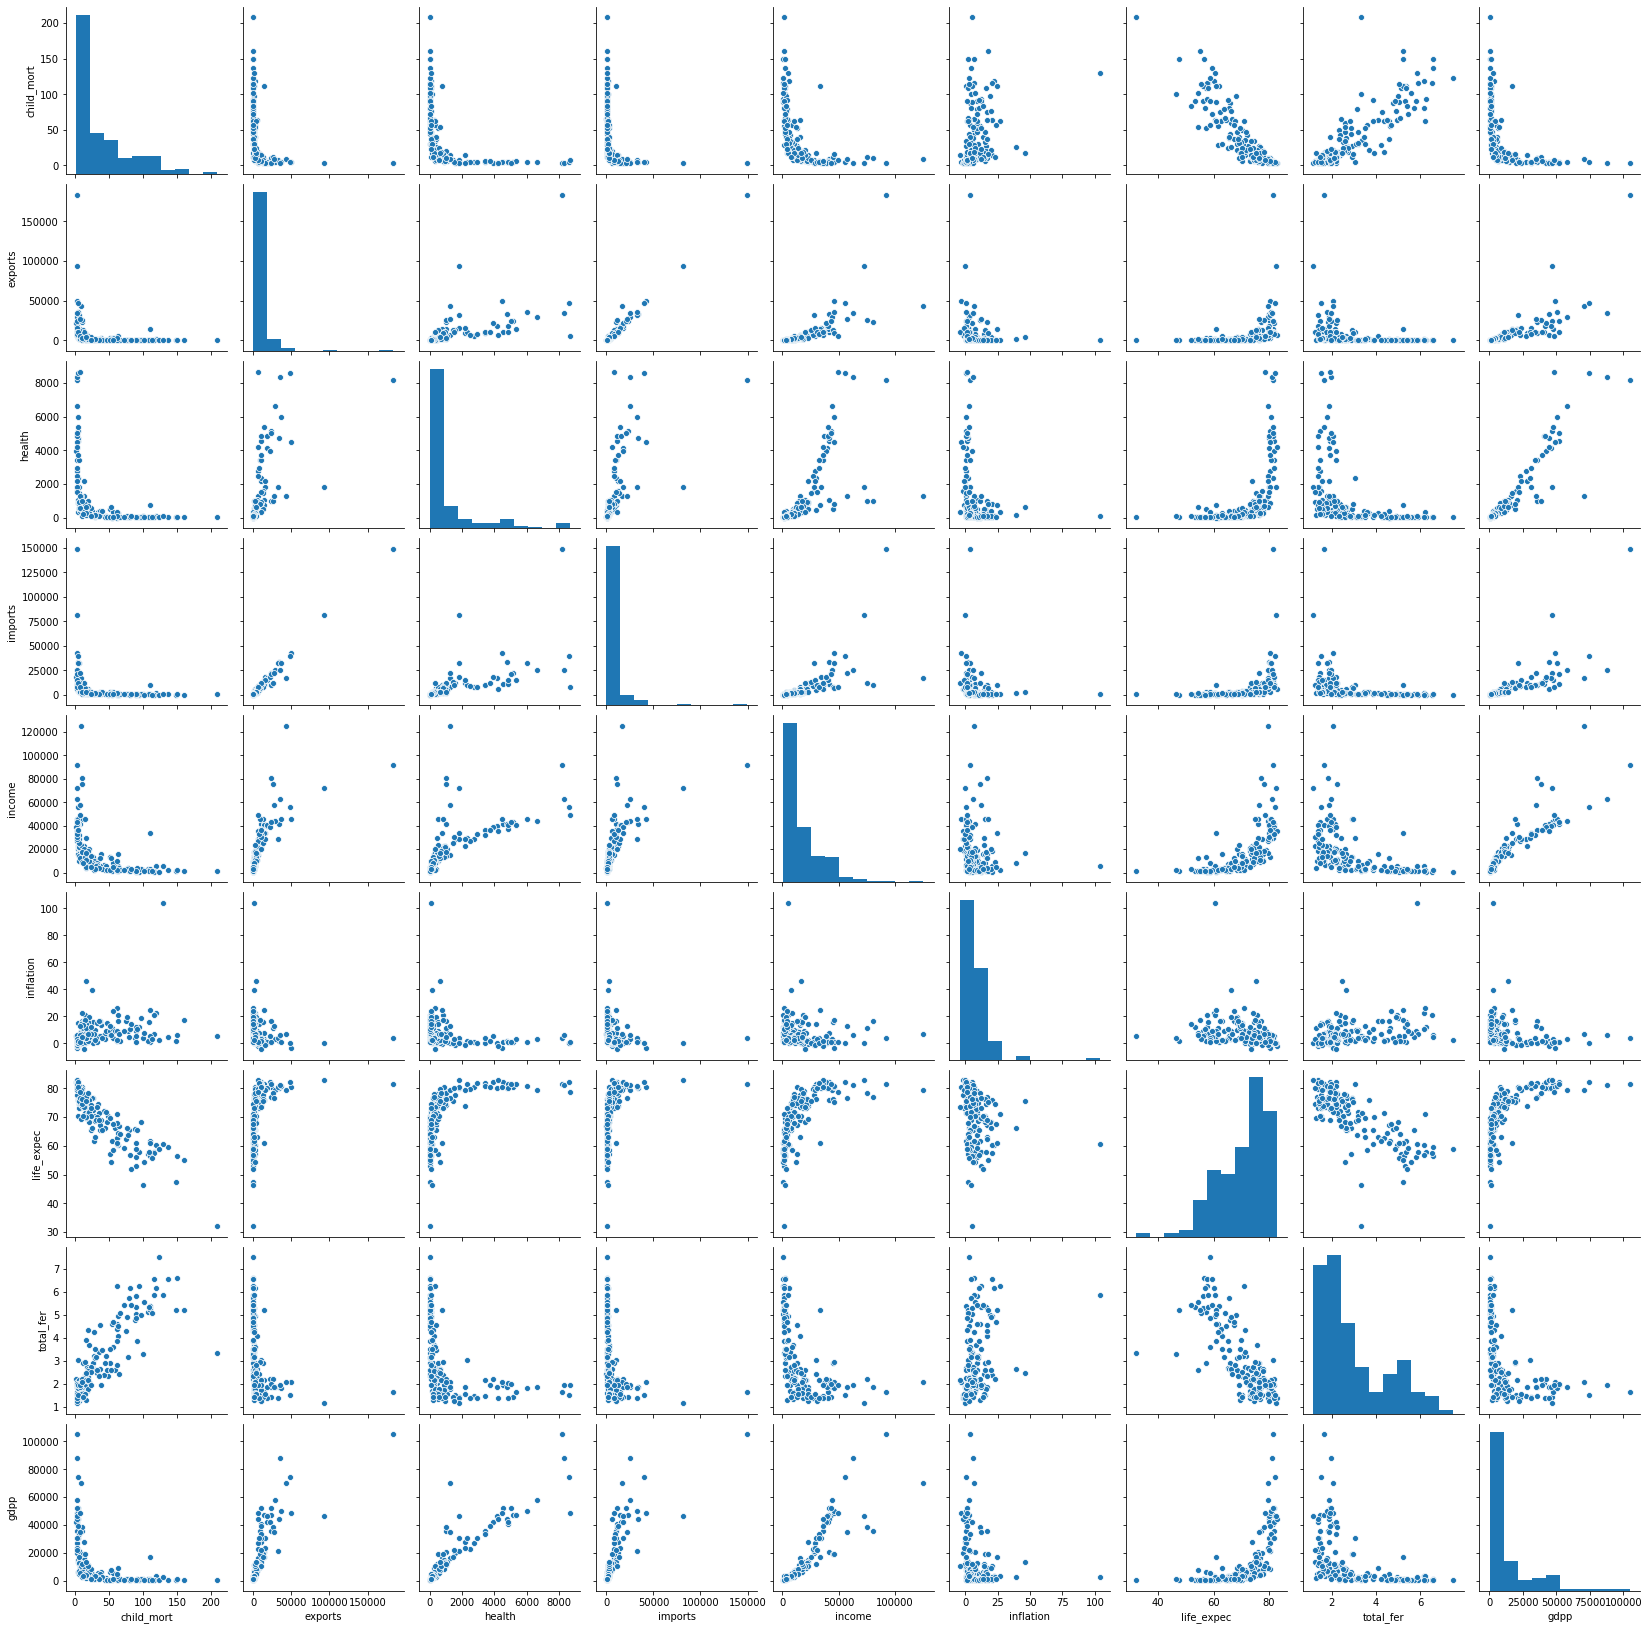

In [13]:
sns.pairplot(countries_data)
plt.show()


In [14]:
### Doing some more EDA and analysisng the range of data in the data set.

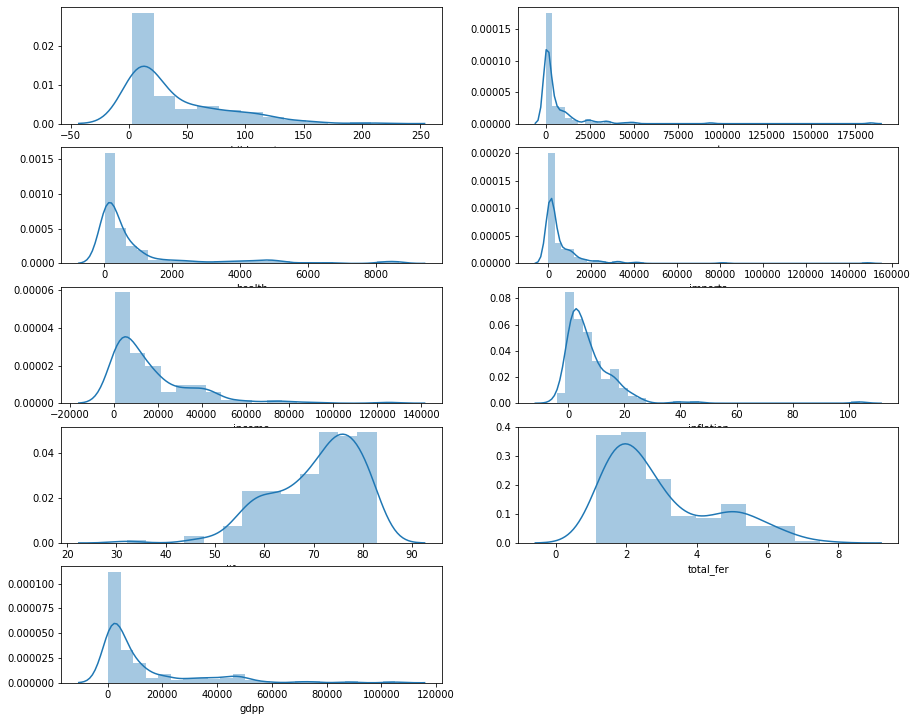

In [15]:
plt.figure(figsize=(15,15))

features = list(countries_data.columns)
for i in enumerate(features):
    ax = plt.subplot(6, 2, i[0]+1)
    sns.distplot(countries_data[i[1]])


### Performing outlier tretment

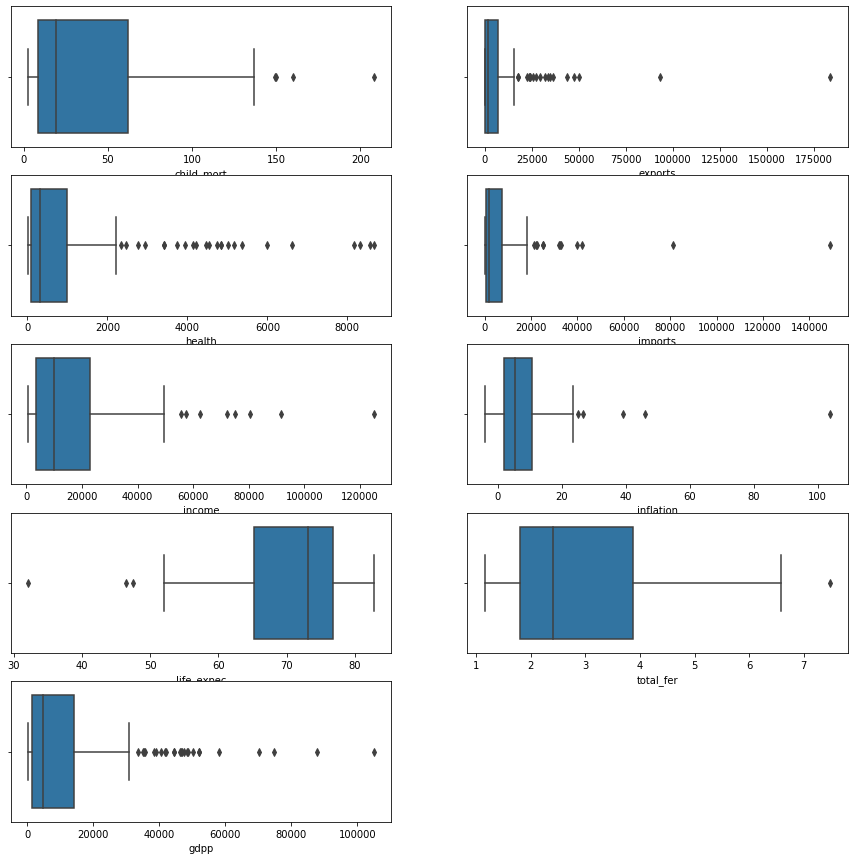

In [16]:
plt.figure(figsize=(15,15))
features = list(countries_data.columns)
for i in enumerate(features):
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(x=i[1],data=countries_data)

As we can see there are outliers in the data set we will use capping technique:
1. The data points more than 99th percentile will be capped to vale at 99th percentile
2. The data falling below 1 percentile will be capped to 1 percentile.

In [17]:
Q4 = countries_data.quantile(q=0.99)
Q4dict = dict(Q4)
Q1 = countries_data.quantile(q=0.01)
Q1dict = dict(Q1)
columns = countries_data.columns
for column in columns:
    countries_data[column][countries_data[column] >= Q4dict[column]] = Q4[column]
    countries_data[column][countries_data[column] <= Q1dict[column]] = Q1[column]


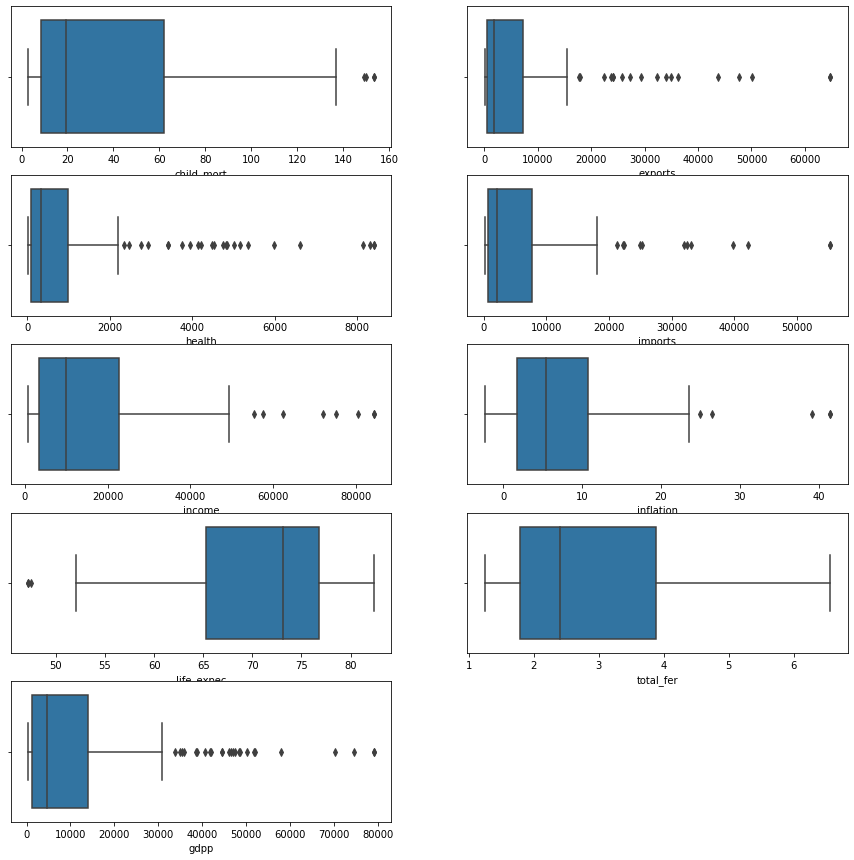

In [18]:
plt.figure(figsize=(15,15))
features = list(countries_data.columns)
for i in enumerate(features):
    ax = plt.subplot(5, 2, i[0]+1)
    sns.boxplot(x=i[1],data=countries_data)

# Part 4 CLUSTERING:

####  We will now check if the given data is good for performing clustering

In [19]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [20]:
hopkins(countries_data)

0.8675049815196944

#### As we can see there is a high clustering tendency in the data

In [21]:
countries_data.head()
cols_store = list(countries_data.columns)

### Now we need to perform scaling of data

In [22]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
countries_data = standard_scaler.fit_transform(countries_data)

In [23]:
countries_data = pd.DataFrame(countries_data)
countries_data.columns = cols_store
countries_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


In [24]:
countries_data.shape

(167, 9)

K Means clustering

Looking at the silhoutte score plot and chosing the number of cluster 

In [25]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

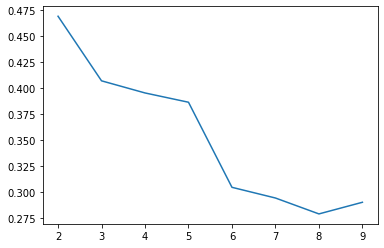

In [26]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(countries_data)
    ss.append([k, silhouette_score(countries_data, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

Looking at the elbow curve

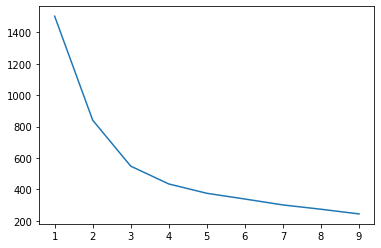

In [27]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(countries_data)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

K Means with k=3

In [28]:
#Let's perform K means using K=3
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
kmean.fit(countries_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [29]:
## Let's make a copy of our original data before using it for analysis
countries_data_org = countries_data.copy()

In [30]:
countries_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


In [31]:
colu = list(countries_data.columns)
colu.append('cluster_id')

In [32]:
# Adding cluster id to the data
df_km = pd.concat([countries_data.reset_index().drop('index', axis = 1), pd.Series(kmean.labels_)], axis = 1)
df_km.columns = colu
df_km.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314,2
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775,0
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483,0
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000,2
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079,0


In [33]:
df_km['cluster_id'].value_counts()

0    90
2    48
1    29
Name: cluster_id, dtype: int64

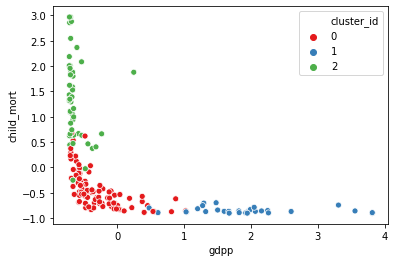

In [34]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

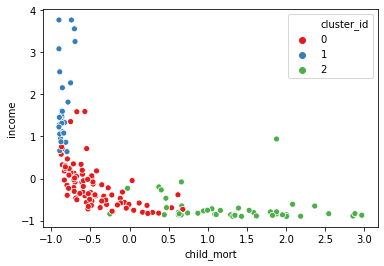

In [35]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'child_mort', y = 'income', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

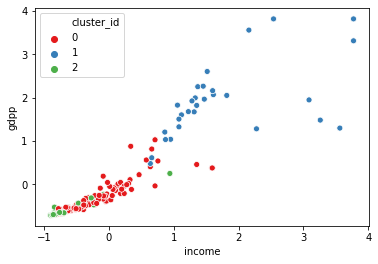

In [36]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km, palette='Set1')

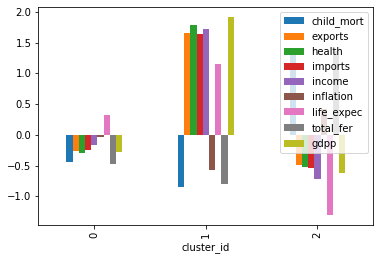

In [37]:
df_km.groupby('cluster_id').mean().plot(kind = 'bar')

In [38]:
countries_data['country'] = country_col


In [39]:
df_km['country'] = country_col

### As we can see countries in cluser 2 are in dire need of aid, followed by cluster 0 and than cluster 1

In [40]:
df_km[df_km['cluster_id']==2].sort_values(by=[ "gdpp","child_mort","income" ], ascending=[True, False,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,country
26,1.431394,-0.572543,-0.575452,-0.614108,-0.899028,0.632791,-1.517915,2.221616,-0.715054,2,Burundi
88,1.320882,-0.569009,-0.568849,-0.593042,-0.900244,-0.248762,-1.154420,1.391131,-0.715054,2,Liberia
37,2.007085,-0.562435,-0.575663,-0.607641,-0.900244,1.729892,-1.541366,2.409145,-0.714917,2,"Congo, Dem. Rep."
112,2.186988,-0.567709,-0.580403,-0.607087,-0.896235,-0.625649,-1.388933,2.424951,-0.714111,2,Niger
132,2.968283,-0.568607,-0.561185,-0.610622,-0.873557,1.265237,-1.834507,1.511686,-0.711176,2,Sierra Leone
93,0.624399,-0.565425,-0.580933,-0.606371,-0.864061,0.179753,-1.154420,1.109838,-0.710370,2,Madagascar
106,1.621578,-0.562900,-0.578234,-0.604669,-0.890426,0.031321,-1.893135,1.752794,-0.710025,2,Mozambique
31,2.855201,-0.569873,-0.580518,-0.612694,-0.892102,-0.695347,-2.713929,1.518383,-0.708471,2,Central African Republic
94,1.351722,-0.565302,-0.573519,-0.608223,-0.884170,0.606977,-2.057294,1.585358,-0.707723,2,Malawi
50,0.444495,-0.572468,-0.580933,-0.613321,-0.862385,0.542441,-1.048889,1.116536,-0.706400,2,Eritrea


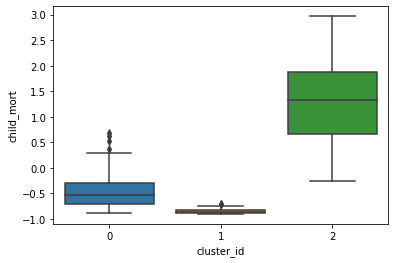

In [41]:
sns.boxplot(x='cluster_id', y='child_mort', data=df_km)

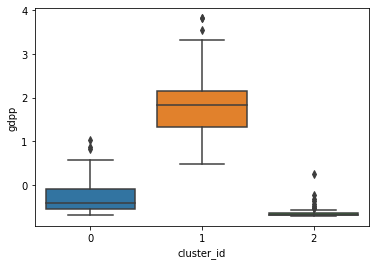

In [42]:
sns.boxplot(x='cluster_id', y='gdpp', data=df_km)

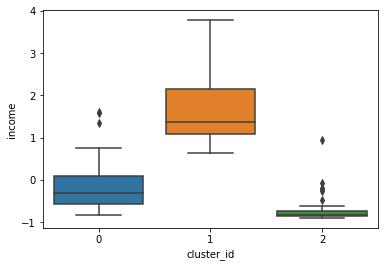

In [43]:
sns.boxplot(x='cluster_id', y='income', data=df_km)

## Part 4. Hierarchical Clustering

In [44]:
countries_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314,Afghanistan
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775,Albania
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483,Algeria
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000,Angola
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079,Antigua and Barbuda


In [45]:
df_km.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,country
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314,2,Afghanistan
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775,0,Albania
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483,0,Algeria
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000,2,Angola
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079,0,Antigua and Barbuda


In [46]:
countries_data.drop('country', axis = 1, inplace = True)

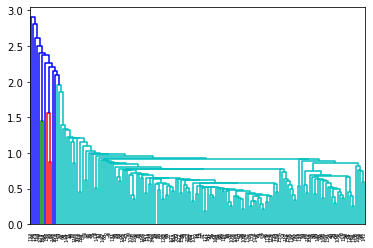

In [47]:
# single linkage
mergings = linkage(countries_data, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

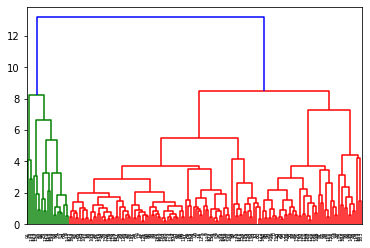

In [48]:
# complete linkage
mergings = linkage(countries_data, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [49]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [50]:
countries_data['cluster_labels'] = cluster_labels
countries_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314,0
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775,1
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483,1
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000,0
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079,1


In [51]:
countries_data['cluster_labels'].value_counts()

1    96
0    50
2    21
Name: cluster_labels, dtype: int64

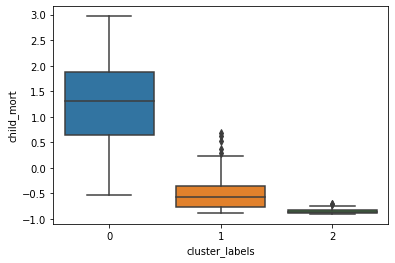

In [52]:
sns.boxplot(x='cluster_labels', y='child_mort', data=countries_data)

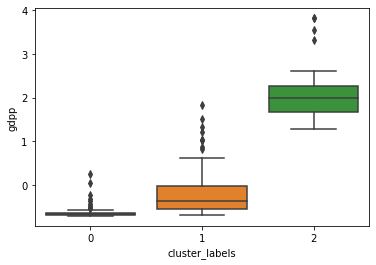

In [53]:
sns.boxplot(x='cluster_labels', y='gdpp', data=countries_data)

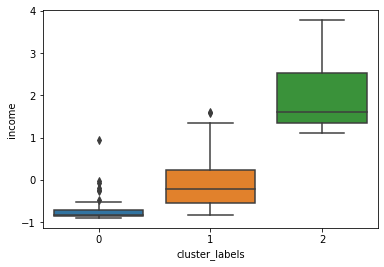

In [54]:
sns.boxplot(x='cluster_labels', y='income', data=countries_data)

In [55]:
countries_data['country'] = country_col

In [56]:
countries_data.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,country
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314,0,Afghanistan
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775,1,Albania
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483,1,Algeria
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000,0,Angola
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079,1,Antigua and Barbuda


### As can be seeen here the countries ith cluster_lable 0 are in dire need of the aid.

In [57]:
in_need = countries_data[countries_data['cluster_labels']==0].sort_values(by=[ "gdpp","child_mort","income" ], ascending=[True, False,True]) 

In [58]:
in_need['country'].head(10)

26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
50                      Eritrea
Name: country, dtype: object

In [59]:
in_need.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels,country
26,1.431394,-0.572543,-0.575452,-0.614108,-0.899028,0.632791,-1.517915,2.221616,-0.715054,0,Burundi
88,1.320882,-0.569009,-0.568849,-0.593042,-0.900244,-0.248762,-1.154420,1.391131,-0.715054,0,Liberia
37,2.007085,-0.562435,-0.575663,-0.607641,-0.900244,1.729892,-1.541366,2.409145,-0.714917,0,"Congo, Dem. Rep."
112,2.186988,-0.567709,-0.580403,-0.607087,-0.896235,-0.625649,-1.388933,2.424951,-0.714111,0,Niger
132,2.968283,-0.568607,-0.561185,-0.610622,-0.873557,1.265237,-1.834507,1.511686,-0.711176,0,Sierra Leone
93,0.624399,-0.565425,-0.580933,-0.606371,-0.864061,0.179753,-1.154420,1.109838,-0.710370,0,Madagascar
106,1.621578,-0.562900,-0.578234,-0.604669,-0.890426,0.031321,-1.893135,1.752794,-0.710025,0,Mozambique
31,2.855201,-0.569873,-0.580518,-0.612694,-0.892102,-0.695347,-2.713929,1.518383,-0.708471,0,Central African Republic
94,1.351722,-0.565302,-0.573519,-0.608223,-0.884170,0.606977,-2.057294,1.585358,-0.707723,0,Malawi
50,0.444495,-0.572468,-0.580933,-0.613321,-0.862385,0.542441,-1.048889,1.116536,-0.706400,0,Eritrea
